## Trabalho 1 - Aprendizado Supervisionado
Andressa Moreira - 19204096

In [57]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier

### Conjunto de dados escolhido


- Título: Pima Indians Diabetes Database 
- Descrição: Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima. Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas e uma variável alvo Outcome. As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.
- Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- Interesse: Meu interesse neste dataset se dá pelo fato de que todos os dados são númericos, não tem dados faltantes e o dataset é composto por 8 features e 1 label. Assim, não é necessário fazer grandes tratamento nos dados e posso focar mais no desenvolvimento/aprimoramento dos algoritmos propostos no enunciado do trabalho. Todo conjunto de dados conta uma história, essa história em específico é um assunto do meu interesse já que ele trata sobre a saúde de mulheres com pelo menos 21 anos de idade com ascendência indígena Pima.

#### Features
* Pregnancies: número de gestações
* Glucose: concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
* BloodPressure: pressão arterial diastólica (mm Hg)
* SkinThickness: espessura da dobra cutânea do tríceps (mm)
* Insuline: insulina sérica de 2 horas (mu U/ml)
* BMI: índice de massa corporal (peso em kg/(altura em m)^2)
* DiabetesPedigreeFunction: função hereditária de diabetes
* Age: idade
#### Label
* Outcome: variável de classe (0 ou 1). 268 de 768 são 1, as outras são 0.

### Conhecendo os dados

In [50]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### K-nn

colocar uma breve descrição do que é knn aqui

In [51]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
# 80% para treinamento
# 20% para teste

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
pred_y = neigh.predict(X_test)
print('Accuracy of model at k = 4 is ', metrics.accuracy_score(y_test, pred_y))

Accuracy of model at k = 4 is  0.7532467532467533


Agora é hora de melhorar o modelo e descobrir o valor k ideal.

Menor erro: 0.21428571428571427 em K = 30


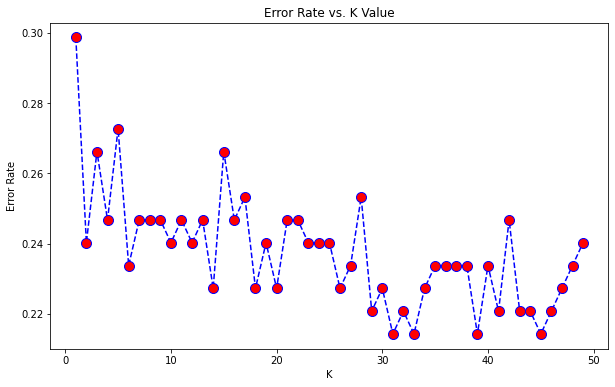

In [52]:
error_rate = []

for i in range(1, 50): # esse range é escolhido por causa do ponto de inflexao 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Menor erro:', min(error_rate), 'em K =', error_rate.index(min(error_rate)))

A partir do gráfico acima, podemos observar que o menor erro é 0,21 e ele ocorre quando k é 30. Agora podemos visualizar o gráfico entre a precisão e o valor K.

k = 1   MAE= 0.24025974025974026   RMSE= 0.4901629731627434
k = 2   MAE= 0.16883116883116883   RMSE= 0.4108907018066591
k = 3   MAE= 0.18181818181818182   RMSE= 0.4264014327112209
k = 4   MAE= 0.12337662337662338   RMSE= 0.35125008665710444
k = 5   MAE= 0.14935064935064934   RMSE= 0.386459117308221
k = 6   MAE= 0.12337662337662338   RMSE= 0.35125008665710444
k = 7   MAE= 0.14935064935064934   RMSE= 0.386459117308221
k = 8   MAE= 0.13636363636363635   RMSE= 0.3692744729379982
k = 9   MAE= 0.14935064935064934   RMSE= 0.386459117308221
k = 10   MAE= 0.14285714285714285   RMSE= 0.3779644730092272
k = 11   MAE= 0.14935064935064934   RMSE= 0.386459117308221
k = 12   MAE= 0.11688311688311688   RMSE= 0.34188172937891387
k = 13   MAE= 0.12337662337662338   RMSE= 0.35125008665710444
k = 14   MAE= 0.1038961038961039   RMSE= 0.3223291856101521
k = 15   MAE= 0.12987012987012986   RMSE= 0.3603749850782236
k = 16   MAE= 0.11038961038961038   RMSE= 0.3322493196224943
k = 17   MAE= 0.12987012987012986 

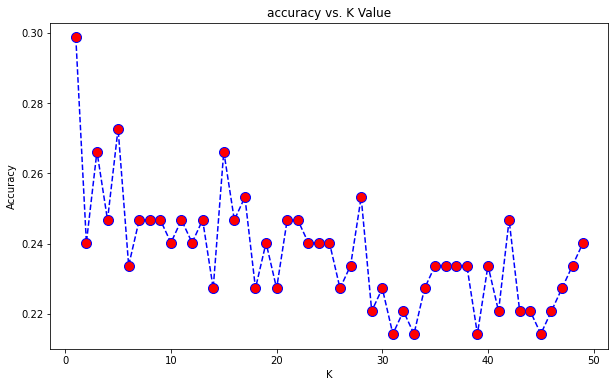

In [53]:
acc = []

for i in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

    MAE = mae(yhat, pred_i)
    RMSE = mse(yhat, pred_i, squared=False)
    print('k =', i,'  MAE=', MAE, '  RMSE=', RMSE)  

plt.figure(figsize = (10, 6))
plt.plot(range(1, 50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Acurácia máxima:', max(acc), 'at K =', acc.index(max(acc)))


Obtivemos a precisão de 0,78 em k = 30. Como já vimos o erro mínimo em k = 30, a melhor eficiência é realmente em k = 30.
OBS: o valor de K encontrado geralmente é a raiz quadrada de N, onde N é o número total de amostras.

Agora que sabemos que o melhor K para este problema é K = 30, podemos ver os valores de MSE e RSME para este K.

In [54]:
neigh = KNeighborsClassifier(n_neighbors = 30).fit(X_train, y_train)
yhat = neigh.predict(X_test)
acc.append(metrics.accuracy_score(y_test, yhat))

MAE = mae(yhat, pred_i)
RMSE = mse(yhat, pred_i, squared=False)
print('k =', 30,'  MAE=', MAE, '  RMSE=', RMSE)

k = 30   MAE= 0.06493506493506493   RMSE= 0.25482359571881275


### Decision Tree

Árvores de Decisão para problemas de classificação são utilizadas para separar um grupo de amostras em subgrupos que tenham características iguais, de mosta a prever para uma amostra fora do conjunto, a qual subcnojunto ela pertencia. 

In [55]:
# separando os dados
# a matriz X deve conter as features das amostras
# a matriz Y deve conter as classes de cada amostra
# a matriz Y é do tipo n x 1 (uma matriz que tem uma única coluna contendo um valor inteiro indicando a classe a que cada amostra pertence)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [63]:
# 80% para treino
# 20% para teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [61]:
# treinando
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# agora que o treino foi feito, vamos fazer as predições dos dados de teste
y_pred = classifier.predict(X_test)

### Naive Bayes

### Conclusão sobre o desempenho dos algoritmos

Referências:
- https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
- Python para Data Science e Machine Learning Descomplicado